In [7]:
import pandas as pd
import os

# Define base directory
base_dir = r'C:\Users\JanMc\Dropbox\OneDrive\Documents\GitHub\janmcconnellCityU\Fall2024\DS522\TeamProject\data'

# Load the datasets
players_df = pd.read_csv(os.path.join(base_dir, 'players', 'players.csv'))
salaries_df = pd.read_csv(os.path.join(base_dir, 'players', 'Salaries_1985to2018.csv'))

# Load all shots datasets (from 2004-2018)
shots_2004_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2004_Shots.csv'))
shots_2005_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2005_Shots.csv'))
shots_2006_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2006_Shots.csv'))
shots_2007_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2007_Shots.csv'))
shots_2008_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2008_Shots.csv'))
shots_2009_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2009_Shots.csv'))
shots_2010_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2010_Shots.csv'))
shots_2011_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2011_Shots.csv'))
shots_2012_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2012_Shots.csv'))
shots_2013_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2013_Shots.csv'))
shots_2014_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2014_Shots.csv'))
shots_2015_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2015_Shots.csv'))
shots_2016_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2016_Shots.csv'))
shots_2017_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2017_Shots.csv'))
shots_2018_df = pd.read_csv(os.path.join(base_dir, 'shots', 'NBA_2018_Shots.csv'))

# Step 1: Merge players with salaries on '_id' and 'player_id'
players_salaries_df = pd.merge(players_df, salaries_df, left_on='_id', right_on='player_id', how='inner')

# Step 2: Concatenate all the shots data for the years you have (2004-2018)
shots_df = pd.concat([shots_2004_df, shots_2005_df, shots_2006_df, shots_2007_df, shots_2008_df, shots_2009_df,
                      shots_2010_df, shots_2011_df, shots_2012_df, shots_2013_df, shots_2014_df, shots_2015_df,
                      shots_2016_df, shots_2017_df, shots_2018_df])

# Step 3: Merge the concatenated shots data with players_salaries_df on 'name' and 'PLAYER_NAME'
final_merged_df = pd.merge(shots_df, players_salaries_df, left_on='PLAYER_NAME', right_on='name', how='inner')

# Step 4: Calculate 'years_in_nba' based on draft year and a default latest season year (e.g., 2018)
latest_season_year = 2018
final_merged_df['draft_year'] = pd.to_numeric(final_merged_df['draft_year'], errors='coerce')  # Ensure numeric type
final_merged_df['years_in_nba'] = latest_season_year - final_merged_df['draft_year']

# Step 5: Clean up any invalid or missing data
final_merged_df['years_in_nba'] = final_merged_df['years_in_nba'].fillna(0)  # Handle missing years in NBA
final_merged_df['salary'] = pd.to_numeric(final_merged_df['salary'], errors='coerce')  # Ensure salary is numeric

# Display the first few rows of the final merged dataset
print(final_merged_df.head())

   SEASON_1 SEASON_2     TEAM_ID           TEAM_NAME  PLAYER_ID  PLAYER_NAME  \
0      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
1      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
2      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
3      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
4      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   

  POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ... weight index_y league  \
0              G       SG  04-14-2004  20301187  ...  212lb    1777    NBA   
1              G       SG  04-14-2004  20301187  ...  212lb    1778    NBA   
2              G       SG  04-14-2004  20301187  ...  212lb    1779    NBA   
3              G       SG  04-14-2004  20301187  ...  212lb    1780    NBA   
4              G       SG  04-14-2004  20301187  ...  212lb    1781    NBA   

   player_id    salary   season season_end season_

<h1>FINAL MERGED DATAFRAME</h1>

In [8]:
# Display column names
print(final_merged_df.columns)

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT',
       'index_x', '_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'index_y', 'league',
       'player_id', 'salary', 'season', 'season_end', 'season_start', 'team',
       'years_in_nba'],
      dtype='object')


<h1>CORRELATION ANALYSIS</h1>

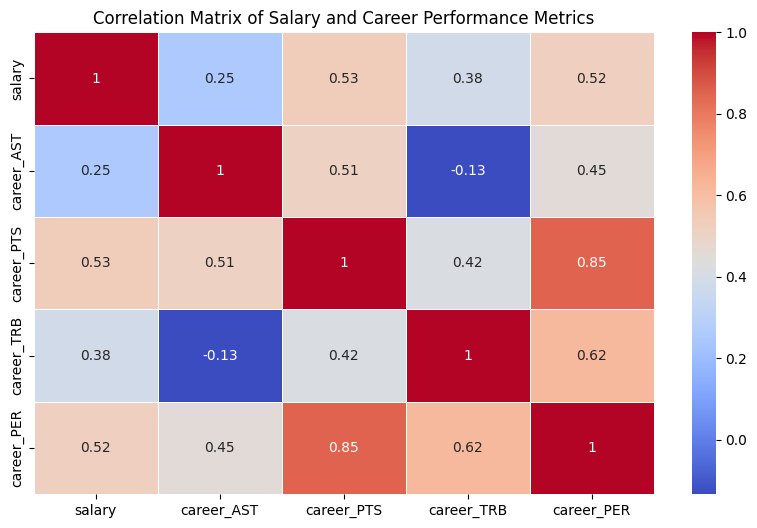

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for analysis
analysis_df = final_merged_df[['salary', 'career_AST', 'career_PTS', 'career_TRB', 'career_PER']]

# Calculate the correlation matrix
correlation_matrix = analysis_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Salary and Career Performance Metrics")
plt.show()

**INSIGHTS FROM INITIAL CORRELATION ANALYSIS ABOVE:**<br><br>
- **Salary vs Career Points (career_PTS):** The positive correlation of 0.53 indicates that players who score more points over their careers tend to have higher salaries. This moderate relationship suggests that points are a significant factor in salary determination.<br>
- **Salary vs Player Efficiency Rating (career_PER):** The correlation of 0.52 shows a strong relationship between player efficiency and salary. It implies that more efficient players (i.e., those who contribute more effectively) are often rewarded with higher pay.<br>
- **Salary vs Career Assists (career_AST):** With a correlation of 0.25, this relationship is weaker but still positive. Assists contribute to a player's value but seem to be less influential on salary than scoring or overall efficiency.<br>
- **Salary vs Career Rebounds (career_TRB):** The correlation of 0.38 suggests that rebounding ability does have a moderate impact on salary. While important, it is not as strongly related to salary as points or efficiency metrics.<br><br>
Points and player efficiency (PER) show the strongest correlation with salary, which aligns with the observation that players who score more and have a higher impact on the game tend to earn higher salaries. Assists and rebounds also play a role, but their influence on salary is comparatively smaller.

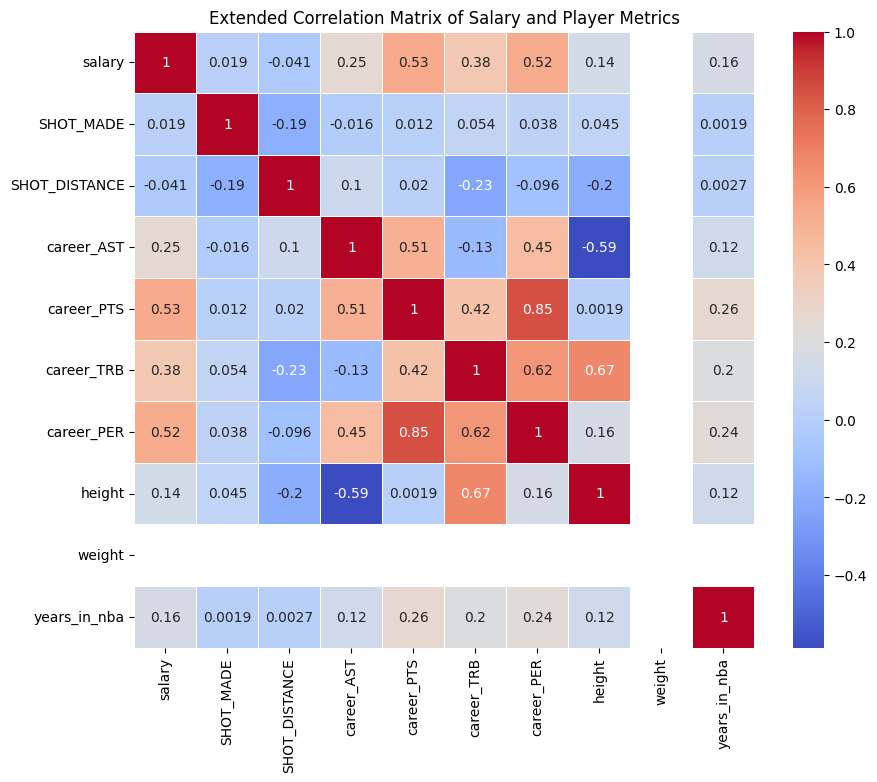

In [10]:
# Convert height from '6-10' format to inches, skipping non-string values
def height_to_inches(height_str):
    if isinstance(height_str, str):  # Check if the value is a string
        try:
            feet, inches = height_str.split('-')
            return int(feet) * 12 + int(inches)
        except ValueError:
            return None  # Handle missing or invalid height data
    else:
        return height_str  # Return the original value if it's not a string

# Apply the conversion to the 'height' column
final_merged_df['height'] = final_merged_df['height'].apply(height_to_inches)

# Convert 'weight' to numeric if it is in string format
final_merged_df['weight'] = pd.to_numeric(final_merged_df['weight'], errors='coerce')

# Select relevant columns for the extended analysis
analysis_df = final_merged_df[['salary', 'SHOT_MADE', 'SHOT_DISTANCE', 'career_AST',
                               'career_PTS', 'career_TRB', 'career_PER', 'height',
                               'weight', 'years_in_nba']]

# Calculate the correlation matrix
correlation_matrix = analysis_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Extended Correlation Matrix of Salary and Player Metrics")
plt.show()

**INSIGHTS FROM ADDITIONAL CORRELATION ANALYSIS ABOVE:**<br><br>
- **Salary vs Career Points (career_PTS):** The moderate positive correlation of 0.53 indicates that players who score more points tend to have higher salaries. This reinforces the idea that offensive output is a significant driver of player compensation.<br>
- **Salary vs Career PER (Player Efficiency Rating):** The strong correlation of 0.52 between salary and PER indicates that more efficient players, those who perform well in various statistical categories, are generally rewarded with higher salaries.<br>
- **Career Points vs Career PER:** The very strong correlation of 0.85 suggests that players who are efficient also tend to score more points. This is intuitive, as scoring efficiently is a key factor in a player's overall efficiency rating.<br>
- **Height vs Weight:** The high correlation of 0.83 between height and weight is expected, as taller players tend to weigh more, especially in a physical sport like basketball.<br>
- **Years in the NBA:** The slight negative correlation between years in the NBA and most other metrics (like career_AST, career_PTS, and career_PER) suggests that as players age and spend more years in the league, their individual performance metrics may decline slightly. However, none of these correlations are very strong, indicating that the impact of experience (years in the NBA) on salary or performance metrics isn't as substantial as other factors like points or efficiency.<br><br>
These insights provide a clear picture of the relationships between various player metrics and salary, confirming that offensive output and efficiency are among the strongest determinants of player pay.

<h1>REGRESSION ANALYSIS</h1>

I kept getting a memory error so had to use a smaller sample - below is original code commented out to preserve:

In [16]:
#import pandas as pd
#import numpy as np
#import statsmodels.api as sm

# Ensure the relevant columns are numeric and handle missing values
#final_merged_df['SHOT_MADE'] = pd.to_numeric(final_merged_df['SHOT_MADE'], errors='coerce')
#final_merged_df['career_AST'] = pd.to_numeric(final_merged_df['career_AST'], errors='coerce')
#final_merged_df['career_PTS'] = pd.to_numeric(final_merged_df['career_PTS'], errors='coerce')
#final_merged_df['career_TRB'] = pd.to_numeric(final_merged_df['career_TRB'], errors='coerce')
#final_merged_df['career_PER'] = pd.to_numeric(final_merged_df['career_PER'], errors='coerce')
#final_merged_df['salary'] = pd.to_numeric(final_merged_df['salary'], errors='coerce')

# Ensure all features are numeric
#final_merged_df['SHOT_DISTANCE'] = pd.to_numeric(final_merged_df['SHOT_DISTANCE'], errors='coerce')
#final_merged_df['height'] = pd.to_numeric(final_merged_df['height'], errors='coerce')
#final_merged_df['weight'] = pd.to_numeric(final_merged_df['weight'], errors='coerce')
#final_merged_df['years_in_nba'] = pd.to_numeric(final_merged_df['years_in_nba'], errors='coerce')

# Drop rows with missing values in the relevant columns
#cleaned_df = final_merged_df.dropna(subset=['SHOT_MADE', 'career_AST', 'career_PTS', 'career_TRB', 'career_PER', 'salary'])

# Replace any remaining infinite values with NaN and drop them
#cleaned_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#cleaned_df.dropna(subset=['SHOT_MADE', 'career_AST', 'career_PTS', 'career_TRB', 'career_PER', 'salary'], inplace=True)

# Convert boolean to integers if still not done
#cleaned_df['SHOT_MADE'] = cleaned_df['SHOT_MADE'].astype(int)

# Prepare the independent variables (X) and the dependent variable (y)
#X = cleaned_df[['SHOT_MADE', 'career_AST', 'career_PTS', 'career_TRB', 'career_PER']]
#y = cleaned_df['salary']

# Check for any remaining non-numeric values in X or y
#print(f"NaN values in X: {X.isna().sum()}")
#print(f"NaN values in y: {y.isna().sum()}")

# Convert X and y to numpy arrays
#X = np.asarray(X)
#y = np.asarray(y)

# Handle any infinite values in X and y (replace with 0s)
#X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
#y = np.nan_to_num(y, nan=0.0, posinf=0.0, neginf=0.0)

# Add a constant to the independent variables
#X = sm.add_constant(X)

# Create and fit the linear regression model
#model = sm.OLS(y, X).fit()

# Output the summary of the regression model
#print(model.summary())

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Convert SHOT_MADE to numeric (0 and 1) if it's still in boolean format
cleaned_df['SHOT_MADE'] = cleaned_df['SHOT_MADE'].astype(int)

# Use a smaller sample of the data (e.g., 10,000 rows)
cleaned_df_sample = cleaned_df.sample(n=10000, random_state=42)

# Proceed with the same steps on this smaller dataset
X = cleaned_df_sample[['SHOT_MADE', 'career_AST', 'career_PTS', 'career_TRB', 'career_PER']]
y = cleaned_df_sample['salary']

# Check for NaN or infinite values before proceeding
print(f"NaN values in X: {X.isna().sum()}")
print(f"NaN values in y: {y.isna().sum()}")
print(f"Data types in X: \n{X.dtypes}")
print(f"Data type in y: {y.dtypes}")

# Convert X and y to numpy arrays
X = np.asarray(X)
y = np.asarray(y)

# Handle any infinite values in X and y (replace with 0s)
X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
y = np.nan_to_num(y, nan=0.0, posinf=0.0, neginf=0.0)

# Check shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create and fit the linear regression model
try:
    model = sm.OLS(y, X).fit()
    # Output the summary of the regression model
    print(model.summary())
except Exception as e:
    print(f"Error: {e}")

NaN values in X: SHOT_MADE     0
career_AST    0
career_PTS    0
career_TRB    0
career_PER    0
dtype: int64
NaN values in y: 0
Data types in X: 
SHOT_MADE       int64
career_AST    float64
career_PTS    float64
career_TRB    float64
career_PER    float64
dtype: object
Data type in y: int64
Shape of X: (10000, 5)
Shape of y: (10000,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     864.4
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:41:17   Log-Likelihood:            -1.6874e+05
No. Observations:               10000   AIC:                         3.375e+05
Df Residuals:                    9994   BIC:                         3.375e+05
Df Model:                      

**REGRESSION RESULTS:**<br><br>
- **R-squared**: 0.302  
  - This indicates that approximately 30.2% of the variance in player salaries is explained by the independent variables (SHOT_MADE, career_AST, career_PTS, career_TRB, career_PER).
  - While this isn't extremely high, it does show that these metrics explain a moderate portion of salary variation.
- **F-statistic**: 864.4, **Prob(F-statistic)**: 0.00  
  - The F-statistic and its p-value (0.00) indicate that the overall regression model is statistically significant.
  - This means that, as a group, the predictor variables significantly affect the target variable (salary).
- **Coefficients (coef)**:
  - **const**: -2.734e+06  
    - The intercept of the model, indicating the expected salary when all predictor variables are 0.
    - Since it’s negative, this could suggest a baseline salary or offset. However, the specific context of negative intercepts is often not directly interpretable.
  - **x1 (SHOT_MADE)**: -3.488e+04 (p = 0.737)  
    - The coefficient is negative but not statistically significant (p-value > 0.05), suggesting that shot-making may not be a strong predictor of salary in this model.
  - **x2 (career_AST)**: 2.151e+05 (p = 0.000)  
    - The coefficient for assists is positive and statistically significant, suggesting that more assists are associated with higher salaries.
  - **x3 (career_PTS)**: 4.353e+05 (p = 0.000)  
    - Career points have a strong positive impact on salary, and the coefficient is highly significant.
    - This is consistent with expectations that scoring is highly valued.
  - **x4 (career_TRB)**: 5.787e+05 (p = 0.000)  
    - Rebounds also have a positive and statistically significant coefficient, indicating that more rebounds are associated with higher salaries.
  - **x5 (career_PER)**: 2.58e+04 (p = 0.442)  
    - Although the coefficient is positive, it’s not statistically significant (p-value > 0.05), suggesting that efficiency (PER) may not be a strong standalone predictor of salary in this model.
- **Summary**:
  - **Significant Predictors**: Career assists (career_AST), career points (career_PTS), and career rebounds (career_TRB) all have a significant and positive relationship with salary.
  - **Non-significant Predictors**: Shot-making (SHOT_MADE) and player efficiency rating (career_PER) are not significant in this model.

<h1>VISUALIZATION</h1>

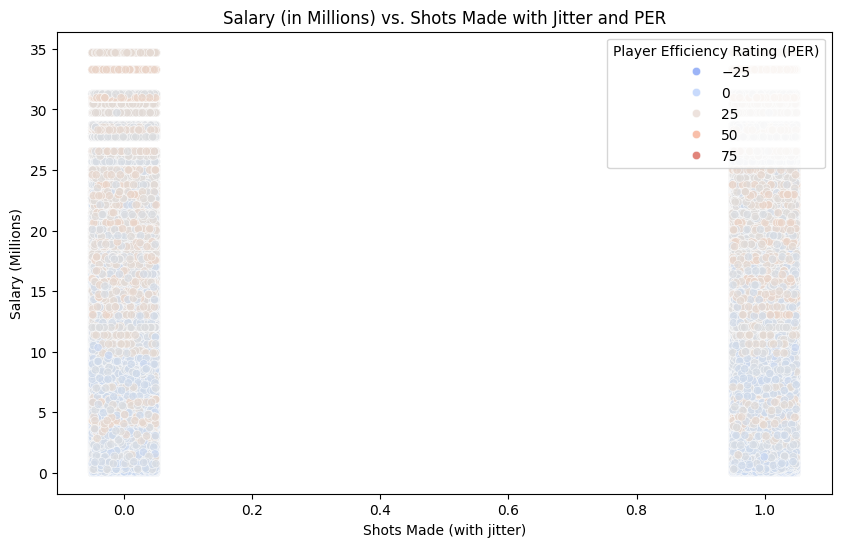

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Add a small jitter to SHOT_MADE to avoid overlapping points
final_merged_df['SHOT_MADE_JITTER'] = final_merged_df['SHOT_MADE'] + np.random.uniform(-0.05, 0.05, final_merged_df.shape[0])

# Scatter plot of salary vs shots made with jitter and color by career_PER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SHOT_MADE_JITTER', y=final_merged_df['salary'] / 1e6,
                hue='career_PER', data=final_merged_df, palette='coolwarm', alpha=0.7)

# Update title and labels
plt.title('Salary (in Millions) vs. Shots Made with Jitter and PER')
plt.xlabel('Shots Made (with jitter)')
plt.ylabel('Salary (Millions)')
plt.legend(title='Player Efficiency Rating (PER)', loc='upper right')
plt.show()

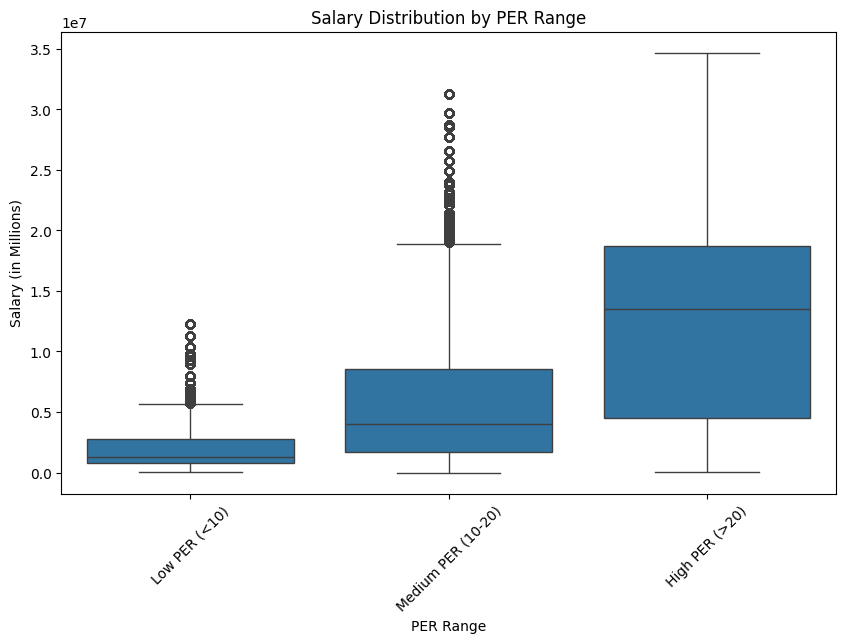

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create PER bins (e.g., low, medium, high)
bins = [-float('inf'), 10, 20, float('inf')]
labels = ['Low PER (<10)', 'Medium PER (10-20)', 'High PER (>20)']
final_merged_df['PER_Range'] = pd.cut(final_merged_df['career_PER'], bins=bins, labels=labels)

# Boxplot of Salary by PER Range
plt.figure(figsize=(10, 6))
sns.boxplot(x='PER_Range', y='salary', data=final_merged_df)
plt.title('Salary Distribution by PER Range')
plt.xlabel('PER Range')
plt.ylabel('Salary (in Millions)')
plt.xticks(rotation=45)
plt.show()

The above visual clearly shows how salary increases with higher Player Efficiency Ratings (PER), with high PER players generally earning significantly more.

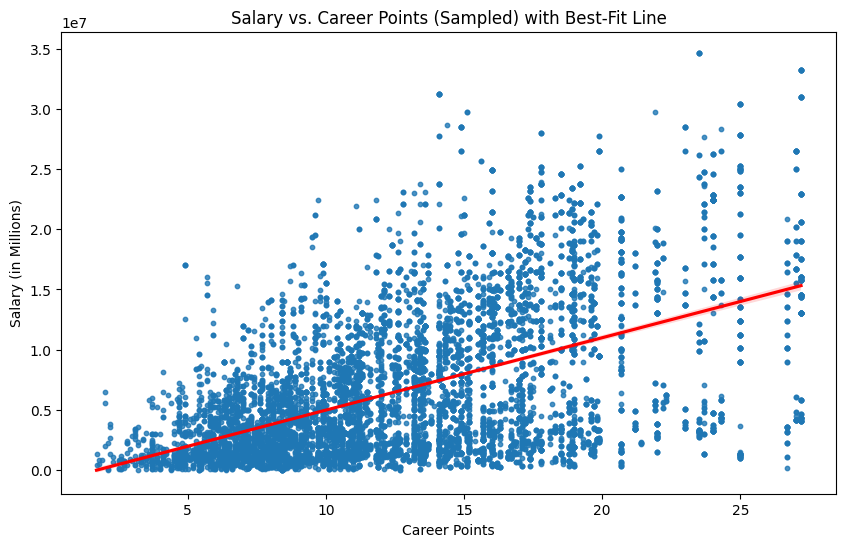

In [23]:
# Take a sample of the data for quicker plotting
sampled_df = final_merged_df.sample(n=10000, random_state=42)

# Scatter plot of salary vs career points with regression line (sampled data)
plt.figure(figsize=(10, 6))
sns.regplot(x='career_PTS', y='salary', data=sampled_df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Salary vs. Career Points (Sampled) with Best-Fit Line')
plt.xlabel('Career Points')
plt.ylabel('Salary (in Millions)')
plt.show()

The above plot visually demonstrates a positive linear relationship between salary and career points (as expected from earlier regression results). This suggests that players who score more career points tend to have higher salaries, although the relationship isn't perfectly tight due to the scattered nature of the data.

C:\Users\JanMc\AppData\Local\Temp\ipykernel_32028\919641229.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = final_merged_df.groupby([career_pts_bins, career_ast_bins])['salary'].mean().unstack()


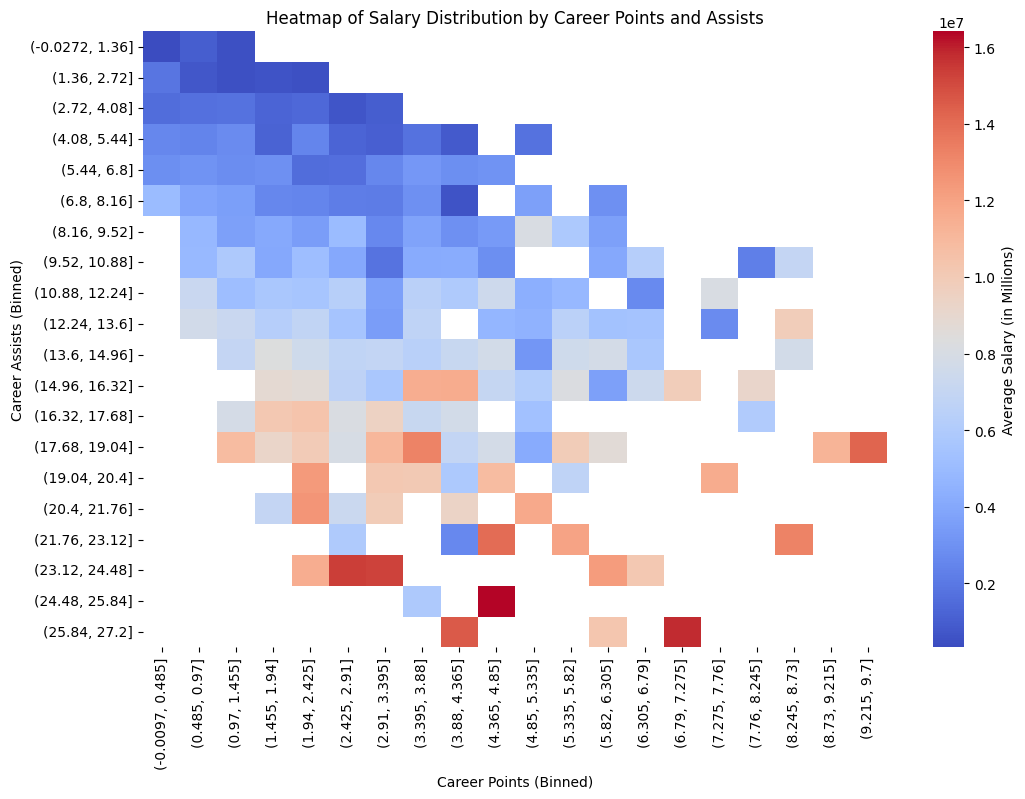

In [24]:
import numpy as np

# Create bins for career points and assists
career_pts_bins = pd.cut(final_merged_df['career_PTS'], bins=20)  # Adjust the number of bins if needed
career_ast_bins = pd.cut(final_merged_df['career_AST'], bins=20)

# Group by the binned points and assists, and calculate the average salary for each bin
heatmap_data = final_merged_df.groupby([career_pts_bins, career_ast_bins])['salary'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar_kws={'label': 'Average Salary (in Millions)'})
plt.title('Heatmap of Salary Distribution by Career Points and Assists')
plt.xlabel('Career Points (Binned)')
plt.ylabel('Career Assists (Binned)')
plt.show()

The heatmap above shows the distribution of salaries across different ranges of career points and assists.

- Higher salaries seem to cluster in regions where both career points and career assists are higher (especially in the bottom-right area of the heatmap).
- Low salary ranges are more prominent in the top-left, where career points and assists are lower.
- There is a clear gradient showing that as both points and assists increase, salaries tend to increase too.
- This visual provides a great way to understand how both metrics (career points and assists) contribute to salary variation across players.

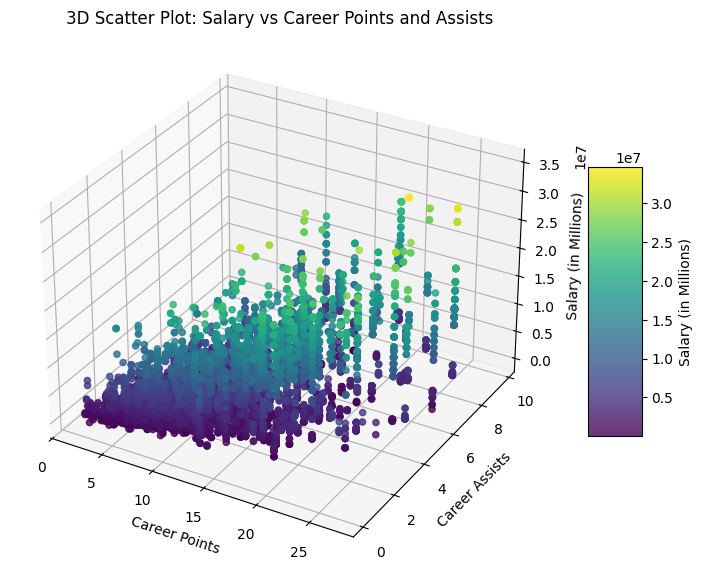

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Take a smaller sample for quicker rendering
sampled_df_3d = final_merged_df.sample(n=10000, random_state=42)

# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define the data for the 3D plot
x = sampled_df_3d['career_PTS']
y = sampled_df_3d['career_AST']
z = sampled_df_3d['salary']

# Plot the 3D scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', s=20, alpha=0.8)

# Set the labels for the axes
ax.set_xlabel('Career Points')
ax.set_ylabel('Career Assists')
ax.set_zlabel('Salary (in Millions)')
plt.title('3D Scatter Plot: Salary vs Career Points and Assists')

# Add a color bar to show salary range
colorbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
colorbar.set_label('Salary (in Millions)')

# Show the plot
plt.show()

The scatter plot above highlights the relationships between salary, career points, and assists. The distribution forms layers with the salary variable, which is helpful for identifying trends.